<a href="https://colab.research.google.com/github/OduaiAbrb/MeriSkill-Data-Analysis-Projects/blob/main/SalesInsightsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [11]:
all_data= pd.read_csv('/content/Sales Data.csv')
all_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [12]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [13]:
all_data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [14]:
all_data = all_data.dropna(how='all')
all_data.shape

(185950, 11)

##The month with the best sale :

In [16]:
'04/19/19 08:46'.split('/')[0]

'04'

In [17]:
def month(x):
  return x.split('/')[0]

In [21]:
all_data['Month']=all_data['Order Date'].apply(month)

In [22]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [23]:
all_data['Month'].unique()

array(['2019-12-30 00:01:00', '2019-12-29 07:03:00',
       '2019-12-12 18:21:00', ..., '2019-06-09 22:07:00',
       '2019-06-26 18:35:00', '2019-06-25 14:33:00'], dtype=object)

In [24]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

185950

In [25]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12


In [26]:
all_data["Month"]

0         2019-12-30 00:01:00
1         2019-12-29 07:03:00
2         2019-12-12 18:21:00
3         2019-12-22 15:13:00
4         2019-12-18 12:38:00
                 ...         
185945    2019-06-07 19:02:00
185946    2019-06-01 19:29:00
185947    2019-06-22 18:57:00
185948    2019-06-26 18:35:00
185949    2019-06-25 14:33:00
Name: Month, Length: 185950, dtype: object

In [27]:
all_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [28]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [ ]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [29]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,sales
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,1700.00,New York City,0,1700.00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,600.00,New York City,7,600.00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18,11.95
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15,149.99
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12,11.95


In [30]:
all_data.groupby('Month')['sales'].sum()

Month
2019-01-01 03:07:00     11.99
2019-01-01 03:40:00     11.95
2019-01-01 04:56:00    150.00
2019-01-01 05:53:00      2.99
2019-01-01 06:03:00     23.90
                        ...  
2020-01-01 04:06:00    149.99
2020-01-01 04:13:00      2.99
2020-01-01 04:21:00     11.95
2020-01-01 04:54:00     99.99
2020-01-01 05:13:00    114.94
Name: sales, Length: 142395, dtype: float64

In [31]:
#city with the max order
'917 1st St , Dallas, TX 75001'.split(',')[1]

' Dallas'

In [34]:
def city(x):
  return x.split(',')[1]

In [35]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [37]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

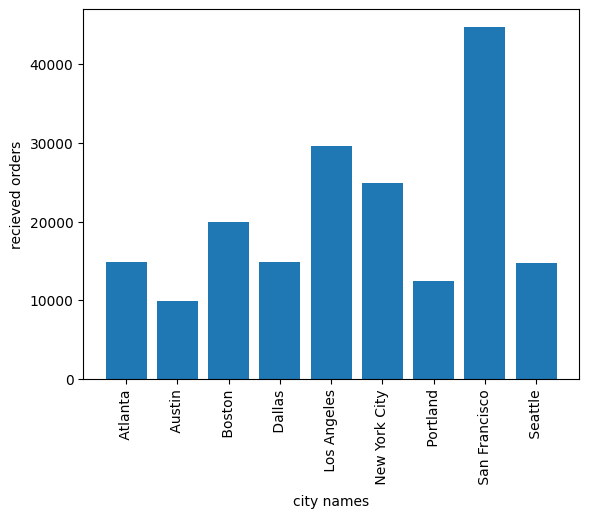

In [38]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('recieved orders')
plt.xlabel('city names')
plt.show()

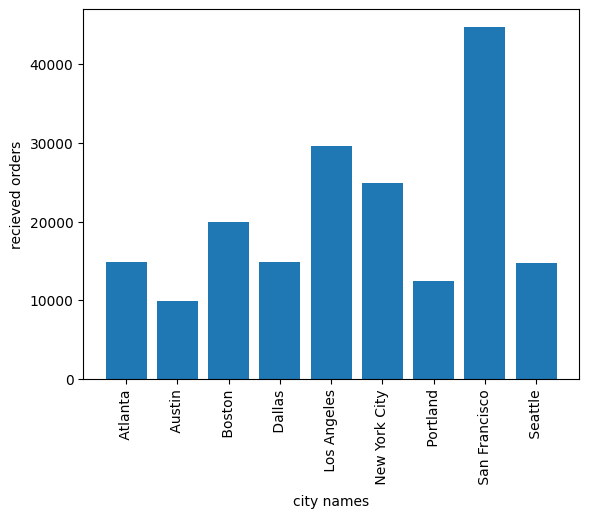

In [39]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('recieved orders')
plt.xlabel('city names')
plt.show()

In [40]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [42]:
keys = []
hour = []
for key,hour_df in all_data.groupby('Hour'):
  keys.append(key)
  hour.append(len(hour_df))

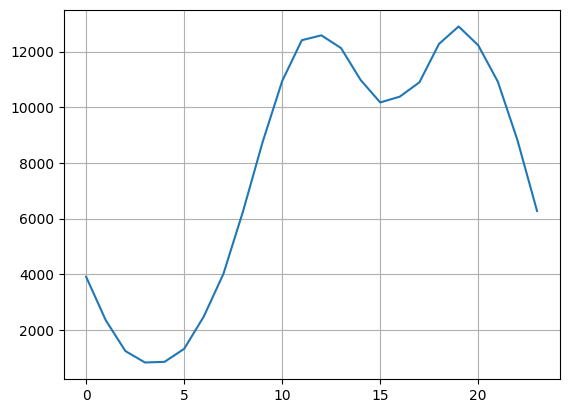

In [43]:
plt.grid()
plt.plot(keys,hour)

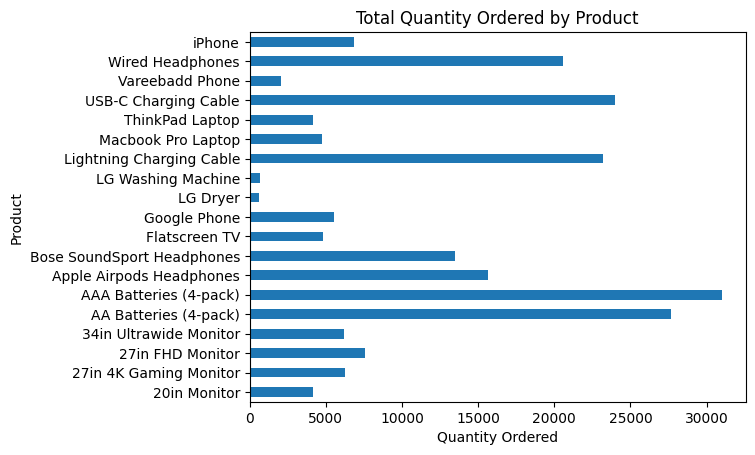

In [45]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='barh')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.title('Total Quantity Ordered by Product')
plt.show()


In [46]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [51]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-53-5515d2638d10>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2200 with 0 Axes>

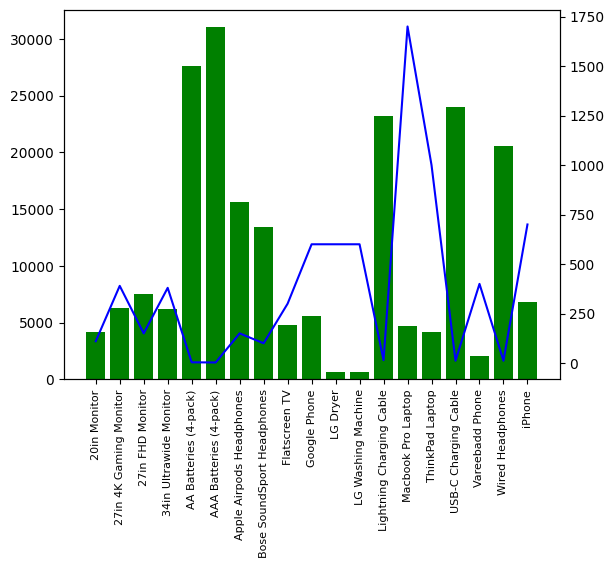

In [53]:
plt.figure(figsize=(40,22))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

In [55]:
 #top selling product is AAA battries
 all_data.shape

(185950, 13)

In [56]:
df=all_data[all_data['Order Date'].duplicated(keep=False)]
df.head(20)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,sales,city
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18,11.95,New York City
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15,149.99,San Francisco
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12,11.95,Atlanta
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",2019-12-28 11:51:00,11.96,Dallas,11,11.96,Dallas
11,11,295676,ThinkPad Laptop,1,999.99,2019-12-28 17:19:00,"410 Lincoln St, Los Angeles, CA 90001",2019-12-28 17:19:00,999.99,Los Angeles,17,999.99,Los Angeles
12,12,295677,AA Batteries (4-pack),2,3.84,2019-12-20 19:19:00,"866 Pine St, Boston, MA 02215",2019-12-20 19:19:00,7.68,Boston,19,7.68,Boston
14,14,295679,USB-C Charging Cable,1,11.95,2019-12-25 09:39:00,"902 2nd St, Dallas, TX 75001",2019-12-25 09:39:00,11.95,Dallas,9,11.95,Dallas
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,600.00,Boston,12,600.00,Boston
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.95,Boston,12,11.95,Boston
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,99.99,Boston,12,99.99,Boston


In [57]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-57-9d66bca9fec4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df.shape

(78166, 14)

In [59]:
df2 = df.drop_duplicates(subset=['Order ID'])

In [61]:
df2 = df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='Grouped'>

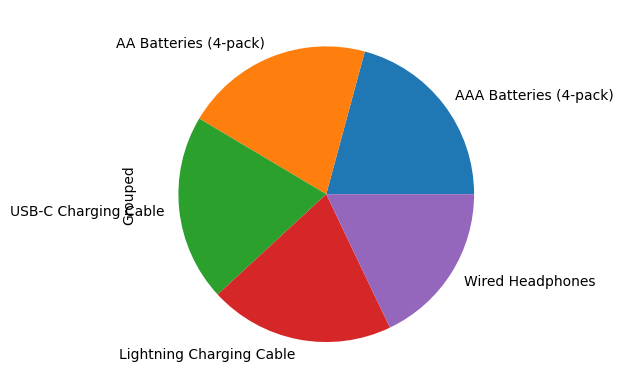

In [64]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [66]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [68]:
trace = go.Pie(
    labels=labels,
    values=values,
    hoverinfo='label+percent',
    textinfo='value',
    textfont=dict(size=25),
    pull=[0, 0, 0, 0.2, 0]  # Here, pull is provided as a keyword argument
)


In [69]:
iplot([trace])

# Data Analysis Report: Sales Trends Analysis

##Introduction:
The purpose of this report is to present the findings of a data analysis project conducted to examine sales trends. The analysis was performed using Python within the Colab environment. The dataset used contains sales data for a given period, and the objective was to identify patterns, popular products, and potential insights to inform business decisions.

#Methodology:
The analysis was carried out using Python programming language in Google Colab. The dataset was loaded into a Pandas DataFrame for manipulation and visualization. Various data analysis libraries such as Pandas, Matplotlib, Seaborn, and Plotly were utilized to explore and visualize the data. Key steps included data cleaning, exploration, aggregation, and visualization.

#Findings:
1. Most Sold Products:
   - AAA Batteries 4 Pack emerged as the top-selling product, indicating a high demand for this item.
   - AA Batteries 4 Pack followed closely as the second most sold product, highlighting a similar trend in consumer preference for battery packs.

2. Popular Accessories:
   - USB-C Charging Cable, Lightning Charging Cable, and Wired Headphones were among the top-selling accessories.
   - These accessories, while not surpassing battery packs in sales, demonstrated significant demand and could represent additional revenue streams.

3. Time Analysis:
   - A further analysis revealed that the best sales performance occurred between 12 PM to 7 PM, suggesting that this timeframe is critical for maximizing sales opportunities.
   - Understanding peak sales hours can aid in optimizing marketing strategies and resource allocation.

#Conclusion:
In conclusion, the data analysis project provided valuable insights into sales trends and consumer behavior. The findings highlighted the popularity of battery packs, particularly AAA and AA variants, and identified key accessory items driving sales. Additionally, understanding the optimal sales hours can assist in refining business strategies to capitalize on peak demand periods. These insights are instrumental in informing inventory management, marketing campaigns, and overall business decisions to enhance profitability and customer satisfaction.

#Recommendations:
Based on the findings, the following recommendations are proposed:
- Implement targeted marketing campaigns to promote popular products during peak sales hours.
- Ensure adequate stock levels of top-selling items, especially battery packs, to meet consumer demand.
- Consider expanding product offerings in accessory categories such as charging cables and headphones to capture additional market share.

Overall, this data analysis project provides actionable insights that can guide strategic decision-making and drive business growth.

All rights reserved © Oduai Aburub